## Dieses Notebook umfasst die Trainingsschritte der Phase 1 der LSTM-Modelle mit Glove-Vektorisierung und dokumentiert die Ergebnisse.

## Codeabschnitt

In [1]:
# !pip install tensorflow


In [1]:
import sys
from pathlib import Path

# Zum übergeordneten Ordner 'src' wechseln
current_path = Path().resolve()
src_path = current_path.parents[4]  # Zwei Stufen nach oben

if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

src_path


WindowsPath('C:/Users/Nasiba/Documents/1 Master Data Science/Projektpraktikum/WebScience24')

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import classification_report, confusion_matrix


#nlp = spacy.load("en_core_web_sm")

pd.set_option('display.max_colwidth', None)

from vector_functions import vectorize_glove, vectorize_glove_test_data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef

import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping



#### Beladung der Daten

In [3]:

source_filepath_name = os.path.abspath(os.path.join(src_path, 'data/twitter_hate-speech/train_cleaned_rnn.csv'))

df_cleaned = pd.read_csv(source_filepath_name, encoding='utf-8', index_col=0)

source_filepath_name_test = os.path.abspath(os.path.join(src_path, 'data/twitter_hate-speech/test_cleaned_rnn.csv'))

df_cleaned_test = pd.read_csv(source_filepath_name_test, encoding='utf-8', index_col=0)

print(df_cleaned.count())

label            20289
tweet            20289
tweet_cleaned    20288
user_handle      20289
hashtags         20289
emojis            4220
dtype: int64


### Vektorisierung

#### GloVe 

In [4]:


twitter_glove_path = os.path.abspath(os.path.join(src_path, 'src/3. Deep Learning Approach/nasiba/glove.6B.200d.txt'))


X_train_vectors, X_test_vectors, y_train, y_test, glove_embeddings,tokenizer = vectorize_glove(df=df_cleaned, text_column ="tweet_cleaned", label_column="label", glove_path=twitter_glove_path)

X_test_data_vectors , y_test_data, glove_embeddings_test,tokenizer_test = vectorize_glove_test_data(df=df_cleaned_test, text_column ="tweet_cleaned", label_column="label", glove_path=twitter_glove_path, tokenizer=tokenizer)


c:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24\src\3. Deep Learning Approach\nasiba\Training\Phase_1\vector_functions.py:507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str)


### Trainieren mit StandardParamatern und Softmax

In [5]:
samples, max_seq_len, vector_size = X_train_vectors.shape
num_classes = len(np.unique(y_train))
print(samples)
print(max_seq_len)
print(vector_size)

26550
50
200


In [ ]:




y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_tr_2 = Sequential()

# LSTM-Schicht
model_tr_2.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_tr_2.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_tr_2.add(Dense(units=num_classes, activation='softmax'))

# Kompilieren des Modells
model_tr_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_tr_2 = model_tr_2.fit(
    X_train_vectors, y_train_onehot,
    validation_data=(X_test_data_vectors, y_test_onehot_data),
    epochs=10,
    batch_size=32,
    verbose=1
)

# Vorhersagen auf Testdaten
predictions_tr = model_tr_2.predict(X_test_data_vectors)
predicted_classes_tr_2 = np.argmax(predictions_tr, axis=1)






C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.7634 - loss: 0.4728 - val_accuracy: 0.8940 - val_loss: 0.2214
Epoch 2/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.9155 - loss: 0.2323 - val_accuracy: 0.8948 - val_loss: 0.3035
Epoch 3/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9545 - loss: 0.1502 - val_accuracy: 0.9330 - val_loss: 0.2174
Epoch 4/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.9754 - loss: 0.0935 - val_accuracy: 0.9298 - val_loss: 0.2319
Epoch 5/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.9846 - loss: 0.0700 - val_accuracy: 0.9481 - val_loss: 0.2156
Epoch 6/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.9853 - loss: 0.0640 - val_accuracy: 0.9343 - val_loss: 0.2450
Epoch 7/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.9830 - loss: 0.0764 - val_accuracy: 0.9503 - val_loss: 0.2492
Epoch 8/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.9910 - loss: 0.0464 - 

### Evaluation

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.95      0.96      8468
     Class 1       0.50      0.62      0.55       625

    accuracy                           0.93      9093
   macro avg       0.74      0.79      0.76      9093
weighted avg       0.94      0.93      0.93      9093

[[8077  391]
 [ 236  389]]


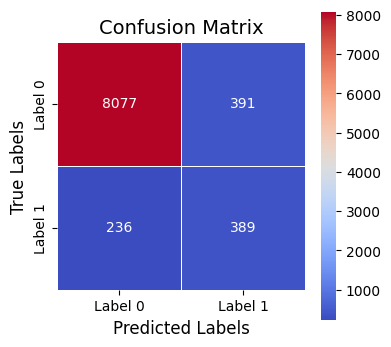

In [8]:
report = classification_report(np.argmax(y_test_onehot_data, axis=1), predicted_classes_tr_2, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(np.argmax(y_test_onehot_data, axis=1), predicted_classes_tr_2)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

#### Modeltraining mit anderen Parametern

(Aktivierungsfunktion in der Dense-Schicht zu sigmoid ändern, da diese für Binärklassifikation besser geeignet)

In [12]:
samples, max_seq_len, vector_size = X_train_vectors.shape
num_classes = len(np.unique(y_train))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_2 = Sequential()

# LSTM-Schicht
model_2.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_2.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_2.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

#class_weight = {0: 1, 1: 3} 
history_2 = model_2.fit(
    X_train_vectors, np.array(y_train),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=10,
    batch_size=32,
    #class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten
predictions_2 = model_2.predict(X_test_data_vectors)
threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_2 = (predictions_2 > threshold).astype(int)

C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
830/830 - 47s - 56ms/step - accuracy: 0.8567 - loss: 0.3501 - recall: 0.8966 - val_accuracy: 0.9077 - val_loss: 0.2398 - val_recall: 0.7504
Epoch 2/10
830/830 - 41s - 50ms/step - accuracy: 0.9311 - loss: 0.1998 - recall: 0.9612 - val_accuracy: 0.9188 - val_loss: 0.2301 - val_recall: 0.7280
Epoch 3/10
830/830 - 42s - 51ms/step - accuracy: 0.9644 - loss: 0.1211 - recall: 0.9817 - val_accuracy: 0.9272 - val_loss: 0.2638 - val_recall: 0.6896
Epoch 4/10
830/830 - 40s - 48ms/step - accuracy: 0.9736 - loss: 0.0951 - recall: 0.9853 - val_accuracy: 0.9392 - val_loss: 0.2270 - val_recall: 0.6448
Epoch 5/10
830/830 - 50s - 60ms/step - accuracy: 0.9831 - loss: 0.0676 - recall: 0.9919 - val_accuracy: 0.9482 - val_loss: 0.2218 - val_recall: 0.5904
Epoch 6/10
830/830 - 39s - 47ms/step - accuracy: 0.9876 - loss: 0.0551 - recall: 0.9927 - val_accuracy: 0.9428 - val_loss: 0.2544 - val_recall: 0.6144
Epoch 7/10
830/830 - 43s - 51ms/step - accuracy: 0.9895 - loss: 0.0490 - recall: 0.9929 - val_

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.95      0.96      8468
     Class 1       0.49      0.65      0.56       625

    accuracy                           0.93      9093
   macro avg       0.73      0.80      0.76      9093
weighted avg       0.94      0.93      0.93      9093

[[8047  421]
 [ 216  409]]


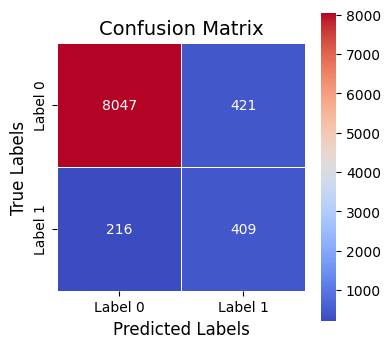

In [13]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_2, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_2)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

#### Modeltraining mit anderen Parametern

(Aktivierungsfunktion in der Dense-Schicht zu sigmoid ändern,class_wight hinzufügen)

In [ ]:
samples, max_seq_len, vector_size = X_train_vectors.shape
num_classes = len(np.unique(y_train))


# Modellinitialisierung
model_3 = Sequential()

# LSTM-Schicht
model_3.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_3.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_3.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_3 = model_3.fit(
    X_train_vectors, np.array(y_train),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=10,
    batch_size=32,
    class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten
predictions_3 = model_3.predict(X_test_data_vectors)
threshold = 0.35  
predicted_classes_3 = (predictions_3 > threshold).astype(int)

C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
830/830 - 39s - 46ms/step - accuracy: 0.8282 - loss: 0.5798 - recall: 0.9562 - val_accuracy: 0.8064 - val_loss: 0.5493 - val_recall: 0.8672
Epoch 2/10
830/830 - 45s - 54ms/step - accuracy: 0.9041 - loss: 0.3703 - recall: 0.9852 - val_accuracy: 0.8999 - val_loss: 0.2950 - val_recall: 0.7760
Epoch 3/10
830/830 - 36s - 43ms/step - accuracy: 0.9376 - loss: 0.2689 - recall: 0.9902 - val_accuracy: 0.8895 - val_loss: 0.3762 - val_recall: 0.7904
Epoch 4/10
830/830 - 41s - 50ms/step - accuracy: 0.9617 - loss: 0.1921 - recall: 0.9910 - val_accuracy: 0.9182 - val_loss: 0.3279 - val_recall: 0.7200
Epoch 5/10
830/830 - 40s - 48ms/step - accuracy: 0.9590 - loss: 0.1982 - recall: 0.9913 - val_accuracy: 0.9088 - val_loss: 0.3559 - val_recall: 0.7312
Epoch 6/10
830/830 - 38s - 46ms/step - accuracy: 0.9608 - loss: 0.1997 - recall: 0.9880 - val_accuracy: 0.9362 - val_loss: 0.2588 - val_recall: 0.6688
Epoch 7/10
830/830 - 44s - 53ms/step - accuracy: 0.9777 - loss: 0.1443 - recall: 0.9904 - val_

### Evaluation

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.98      0.93      0.95      8468
     Class 1       0.43      0.71      0.54       625

    accuracy                           0.92      9093
   macro avg       0.71      0.82      0.75      9093
weighted avg       0.94      0.92      0.93      9093

[[7888  580]
 [ 180  445]]


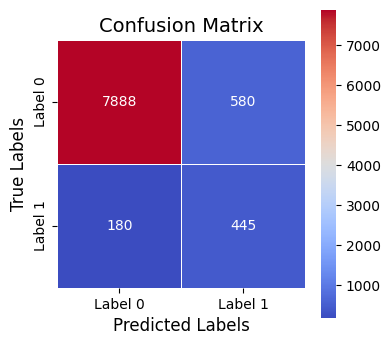

In [8]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_3, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_3)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

#### Modeltraining mit anderen Parametern

(units erhöht mit sigmoid)

In [ ]:
samples, max_seq_len, vector_size = X_train_vectors.shape
num_classes = len(np.unique(y_train))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_6 = Sequential()

# LSTM-Schicht
model_6.add(LSTM(units=192, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_6.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_6.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_6.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_6 = model_6.fit(
    X_train_vectors, np.array(y_train),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=10,
    batch_size=32,
   class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten

# Vorhersagen auf Testdaten
predictions_6 = model_6.predict(X_test_data_vectors)
threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_6 = (predictions_6 > threshold).astype(int)
#predicted_classes_3 = np.argmax(predictions_2, axis=1)



C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
631/631 - 34s - 55ms/step - accuracy: 0.9143 - loss: 0.3883 - recall_4: 0.4936 - val_accuracy: 0.9360 - val_loss: 0.2307 - val_recall_4: 0.3462
Epoch 2/10
631/631 - 31s - 48ms/step - accuracy: 0.9284 - loss: 0.4474 - recall_4: 0.3456 - val_accuracy: 0.9390 - val_loss: 0.2131 - val_recall_4: 0.1832
Epoch 3/10
631/631 - 32s - 51ms/step - accuracy: 0.9274 - loss: 0.3902 - recall_4: 0.4425 - val_accuracy: 0.8796 - val_loss: 0.3016 - val_recall_4: 0.6454
Epoch 4/10
631/631 - 36s - 58ms/step - accuracy: 0.9293 - loss: 0.3248 - recall_4: 0.5808 - val_accuracy: 0.9445 - val_loss: 0.1598 - val_recall_4: 0.5613
Epoch 5/10
631/631 - 33s - 52ms/step - accuracy: 0.9404 - loss: 0.2723 - recall_4: 0.6476 - val_accuracy: 0.9471 - val_loss: 0.1507 - val_recall_4: 0.5866
Epoch 6/10
631/631 - 31s - 50ms/step - accuracy: 0.9458 - loss: 0.2458 - recall_4: 0.6912 - val_accuracy: 0.9478 - val_loss: 0.1489 - val_recall_4: 0.4908
Epoch 7/10
631/631 - 31s - 50ms/step - accuracy: 0.9521 - loss: 0.2161

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.98      0.97      8239
     Class 1       0.67      0.60      0.63       595

    accuracy                           0.95      8834
   macro avg       0.82      0.79      0.80      8834
weighted avg       0.95      0.95      0.95      8834

[[8061  178]
 [ 240  355]]


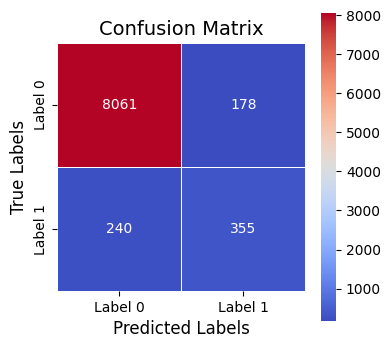

In [28]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_6, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_6)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

#### Modeltraining mit anderen Parametern

(Dropout reduzieren mit sigmoid)

In [ ]:
samples, max_seq_len, vector_size = X_train_vectors.shape
num_classes = len(np.unique(y_train))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_4 = Sequential()

# LSTM-Schicht
model_4.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_4.add(Dropout(0.3))

# Dense-Schicht für die Ausgabe
model_4.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_4 = model_4.fit(
    X_train_vectors, np.array(y_train),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=10,
    batch_size=32,
    class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten

predictions_4 = model_4.predict(X_test_data_vectors)

threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_4= (predictions_4 > threshold).astype(int)



C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
631/631 - 29s - 45ms/step - accuracy: 0.9115 - loss: 0.4793 - recall_5: 0.2772 - val_accuracy: 0.9236 - val_loss: 0.2436 - val_recall_5: 0.4034
Epoch 2/10
631/631 - 25s - 40ms/step - accuracy: 0.9073 - loss: 0.4171 - recall_5: 0.4726 - val_accuracy: 0.9355 - val_loss: 0.2361 - val_recall_5: 0.0739
Epoch 3/10
631/631 - 26s - 41ms/step - accuracy: 0.9304 - loss: 0.4880 - recall_5: 0.1893 - val_accuracy: 0.9349 - val_loss: 0.2805 - val_recall_5: 0.0975
Epoch 4/10
631/631 - 25s - 40ms/step - accuracy: 0.9354 - loss: 0.4979 - recall_5: 0.1330 - val_accuracy: 0.9349 - val_loss: 0.2598 - val_recall_5: 0.0975
Epoch 5/10
631/631 - 25s - 40ms/step - accuracy: 0.9355 - loss: 0.4958 - recall_5: 0.1360 - val_accuracy: 0.9340 - val_loss: 0.2682 - val_recall_5: 0.1076
Epoch 6/10
631/631 - 25s - 40ms/step - accuracy: 0.9357 - loss: 0.4895 - recall_5: 0.1638 - val_accuracy: 0.9339 - val_loss: 0.2723 - val_recall_5: 0.1059
Epoch 7/10
631/631 - 26s - 41ms/step - accuracy: 0.9358 - loss: 0.4883

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.97      0.97      8239
     Class 1       0.59      0.63      0.61       595

    accuracy                           0.95      8834
   macro avg       0.78      0.80      0.79      8834
weighted avg       0.95      0.95      0.95      8834

[[7978  261]
 [ 219  376]]


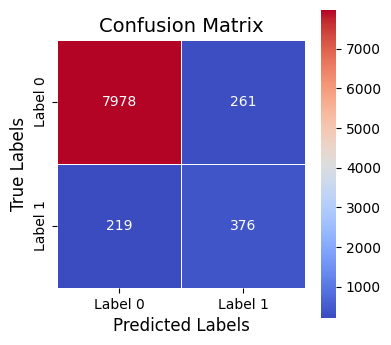

In [30]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_4, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_4)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

#### Modeltraining mit anderen Parametern

(Epochenerhöhung mit sigmoid)

In [6]:
samples, max_seq_len, vector_size = X_train_vectors.shape
num_classes = len(np.unique(y_train))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_7 = Sequential()

# LSTM-Schicht
model_7.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_7 .add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_7 .add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_7 .compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_7 = model_7 .fit(
    X_train_vectors, np.array(y_train),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=20,
    batch_size=32,
    class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten

predictions_7 =model_7.predict(X_test_data_vectors)

threshold = 0.35  # Oder teste 0.4 oder 0.6
predicted_classes_7 = (predictions_7 > threshold).astype(int)



C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
830/830 - 49s - 58ms/step - accuracy: 0.8350 - loss: 0.5574 - recall: 0.9629 - val_accuracy: 0.8411 - val_loss: 0.3894 - val_recall: 0.8592
Epoch 2/20
830/830 - 48s - 57ms/step - accuracy: 0.9124 - loss: 0.3507 - recall: 0.9837 - val_accuracy: 0.8776 - val_loss: 0.3824 - val_recall: 0.8128
Epoch 3/20
830/830 - 43s - 52ms/step - accuracy: 0.9392 - loss: 0.2748 - recall: 0.9892 - val_accuracy: 0.8939 - val_loss: 0.3277 - val_recall: 0.7760
Epoch 4/20
830/830 - 37s - 44ms/step - accuracy: 0.9599 - loss: 0.1976 - recall: 0.9900 - val_accuracy: 0.8824 - val_loss: 0.3027 - val_recall: 0.7984
Epoch 5/20
830/830 - 45s - 54ms/step - accuracy: 0.9672 - loss: 0.1669 - recall: 0.9938 - val_accuracy: 0.9357 - val_loss: 0.2570 - val_recall: 0.6816
Epoch 6/20
830/830 - 44s - 53ms/step - accuracy: 0.9673 - loss: 0.1614 - recall: 0.9940 - val_accuracy: 0.8718 - val_loss: 0.5569 - val_recall: 0.7776
Epoch 7/20
830/830 - 40s - 48ms/step - accuracy: 0.9779 - loss: 0.1243 - recall: 0.9954 - val_

In [14]:
# Vorhersagen auf Testdaten

predictions_7 =model_7.predict(X_test_data_vectors)

threshold = 0.35  # Oder teste 0.4 oder 0.6
predicted_classes_7 = (predictions_7 > threshold).astype(int)

285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


⚡ F1-Score (Klasse 2): 0.5812
🔄 Recall (Klasse 2): 0.6384
🎯 Precision (Klasse 2): 0.5334
✅ Accuracy (gesamt): 0.9368
🔗 MCC: 0.5499
Confusion Matrix:
 [[8119  349]
 [ 226  399]]


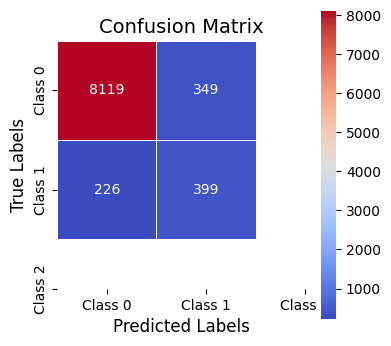

In [ ]:
# Klassifikationsbericht erstellen (als Dictionary)
report = classification_report(y_test_data, predicted_classes_7, output_dict=True)

# Metriken NUR für Klasse 2 extrahieren
precision_class_2 = report["1"]["precision"]
recall_class_2 = report["1"]["recall"]
f1_class_2 = report["1"]["f1-score"]

# Gesamtgenauigkeit berechnen
accuracy = accuracy_score(y_test_data, predicted_classes_7)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test_data, predicted_classes_7)

# Ergebnisse ausgeben (nur für Klasse 2)
print(f" F1-Score (Klasse 2): {f1_class_2:.4f}")
print(f" Recall (Klasse 2): {recall_class_2:.4f}")
print(f" Precision (Klasse 2): {precision_class_2:.4f}")
print(f" Accuracy (gesamt): {accuracy:.4f}")
print(f" MCC: {mcc:.4f}")

# Confusion Matrix berechnen
cm = confusion_matrix(y_test_data, predicted_classes_7)
print("Confusion Matrix:\n", cm)

# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

#### Modeltraining mit anderen Parametern

Kombi

In [6]:
samples, max_seq_len, vector_size = X_train_vectors.shape
num_classes = len(np.unique(y_train))



# Modellinitialisierung
model_8 = Sequential()

# LSTM-Schicht
model_8.add(LSTM(units=256, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_8.add(Dropout(0.3))

# Dense-Schicht für die Ausgabe
model_8.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_8.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_8 = model_8.fit(
    X_train_vectors, np.array(y_train),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=20,
    batch_size=32,
    class_weight=class_weight,
    verbose=2
)

# Vorhersagen auf Testdaten

predictions_8 = model_8.predict(X_test_data_vectors)

threshold = 0.35  # Oder teste 0.4 oder 0.6
predicted_classes_8= (predictions_8 > threshold).astype(int)



C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
830/830 - 90s - 109ms/step - accuracy: 0.8223 - loss: 0.6062 - recall: 0.9525 - val_accuracy: 0.7461 - val_loss: 0.6266 - val_recall: 0.9072
Epoch 2/20
830/830 - 86s - 103ms/step - accuracy: 0.8417 - loss: 0.4993 - recall: 0.9774 - val_accuracy: 0.0697 - val_loss: 1.2356 - val_recall: 0.9984
Epoch 3/20
830/830 - 61s - 74ms/step - accuracy: 0.8908 - loss: 0.3905 - recall: 0.9787 - val_accuracy: 0.8159 - val_loss: 0.5576 - val_recall: 0.8800
Epoch 4/20
830/830 - 54s - 66ms/step - accuracy: 0.9366 - loss: 0.2650 - recall: 0.9877 - val_accuracy: 0.9119 - val_loss: 0.2859 - val_recall: 0.7520
Epoch 5/20
830/830 - 57s - 69ms/step - accuracy: 0.9549 - loss: 0.2038 - recall: 0.9901 - val_accuracy: 0.9074 - val_loss: 0.2841 - val_recall: 0.7632
Epoch 6/20
830/830 - 56s - 68ms/step - accuracy: 0.9743 - loss: 0.1451 - recall: 0.9928 - val_accuracy: 0.9318 - val_loss: 0.2826 - val_recall: 0.6736
Epoch 7/20
830/830 - 585s - 704ms/step - accuracy: 0.9795 - loss: 0.1192 - recall: 0.9940 - 

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.98      0.97      8468
     Class 1       0.68      0.53      0.60       625

    accuracy                           0.95      9093
   macro avg       0.82      0.76      0.78      9093
weighted avg       0.95      0.95      0.95      9093

[[8308  160]
 [ 292  333]]


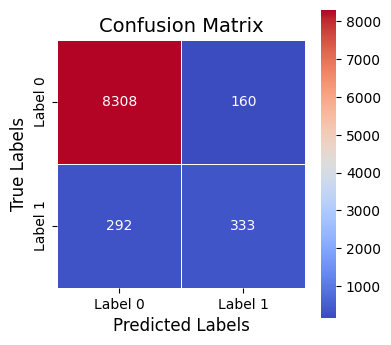

In [7]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_8, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_8)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

⚡ F1-Score (Klasse 2): 0.5957
🔄 Recall (Klasse 2): 0.5328
🎯 Precision (Klasse 2): 0.6755
✅ Accuracy (gesamt): 0.9503
🔗 MCC: 0.5742
Confusion Matrix:
 [[8308  160]
 [ 292  333]]


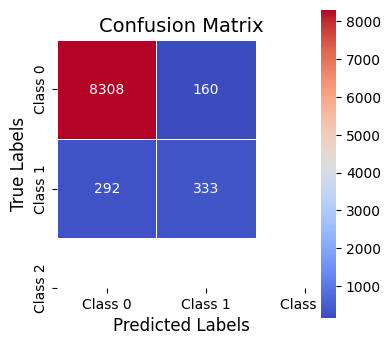

In [8]:
# Klassifikationsbericht erstellen (als Dictionary)
report = classification_report(y_test_data, predicted_classes_8, output_dict=True)

# Metriken NUR für Klasse 2 extrahieren
precision_class_2 = report["1"]["precision"]
recall_class_2 = report["1"]["recall"]
f1_class_2 = report["1"]["f1-score"]

# Gesamtgenauigkeit berechnen
accuracy = accuracy_score(y_test_data, predicted_classes_8)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test_data, predicted_classes_8)

# Ergebnisse ausgeben (nur für Klasse 2)
print(f"⚡ F1-Score (Klasse 2): {f1_class_2:.4f}")
print(f"🔄 Recall (Klasse 2): {recall_class_2:.4f}")
print(f"🎯 Precision (Klasse 2): {precision_class_2:.4f}")
print(f"✅ Accuracy (gesamt): {accuracy:.4f}")
print(f"🔗 MCC: {mcc:.4f}")

# Confusion Matrix berechnen
cm = confusion_matrix(y_test_data, predicted_classes_8)
print("Confusion Matrix:\n", cm)

# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

#### Modeltraining mit anderen Parametern

Batchsize Erhöhung

In [ ]:
samples, max_seq_len, vector_size = X_train_vectors.shape
num_classes = len(np.unique(y_train))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_9 = Sequential()

# LSTM-Schicht
model_9.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_9.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_9.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_9.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_9 = model_8.fit(
    X_train_vectors, np.array(y_train),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=10,
    batch_size=64,
    class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten

predictions_9 = model_9.predict(X_test_data_vectors)

threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_9= (predictions_9 > threshold).astype(int)



C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
316/316 - 60s - 189ms/step - accuracy: 0.9958 - loss: 0.0342 - recall_8: 0.9737 - val_accuracy: 0.9475 - val_loss: 0.2391 - val_recall_8: 0.6168
Epoch 2/10
316/316 - 72s - 228ms/step - accuracy: 0.9980 - loss: 0.0258 - recall_8: 0.9797 - val_accuracy: 0.9483 - val_loss: 0.2505 - val_recall_8: 0.6168
Epoch 3/10
316/316 - 51s - 161ms/step - accuracy: 0.9968 - loss: 0.0291 - recall_8: 0.9745 - val_accuracy: 0.9501 - val_loss: 0.2368 - val_recall_8: 0.5496
Epoch 4/10
316/316 - 47s - 148ms/step - accuracy: 0.9975 - loss: 0.0251 - recall_8: 0.9797 - val_accuracy: 0.9504 - val_loss: 0.2524 - val_recall_8: 0.5832
Epoch 5/10
316/316 - 59s - 188ms/step - accuracy: 0.9973 - loss: 0.0254 - recall_8: 0.9790 - val_accuracy: 0.9466 - val_loss: 0.2633 - val_recall_8: 0.6134
Epoch 6/10
316/316 - 57s - 179ms/step - accuracy: 0.9973 - loss: 0.0250 - recall_8: 0.9805 - val_accuracy: 0.9510 - val_loss: 0.2143 - val_recall_8: 0.5395
Epoch 7/10
316/316 - 46s - 146ms/step - accuracy: 0.9975 - loss:

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.93      0.69      0.79      8239
     Class 1       0.05      0.24      0.09       595

    accuracy                           0.66      8834
   macro avg       0.49      0.46      0.44      8834
weighted avg       0.87      0.66      0.74      8834

[[5680 2559]
 [ 452  143]]


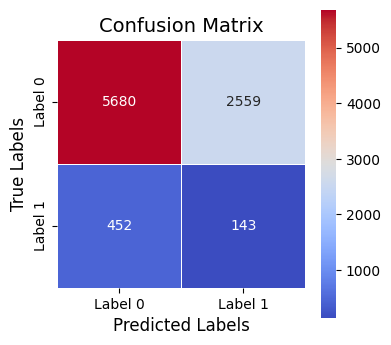

In [38]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_9, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_9)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

Epcohenerhöhung, dropout Reduzierung 

In [ ]:
samples, max_seq_len, vector_size = X_train_vectors.shape
num_classes = len(np.unique(y_train))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_10 = Sequential()

# LSTM-Schicht
model_10.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_10.add(Dropout(0.3))

# Dense-Schicht für die Ausgabe
model_10.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_10.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_10 = model_10.fit(
    X_train_vectors, np.array(y_train),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=20,
    batch_size=32,
    class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten

predictions_10 = model_10.predict(X_test_data_vectors)

threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_10= (predictions_10 > threshold).astype(int)



C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
634/634 - 29s - 46ms/step - accuracy: 0.9335 - loss: 0.5335 - recall: 0.0179 - val_accuracy: 0.9314 - val_loss: 0.2894 - val_recall: 0.0112
Epoch 2/20
634/634 - 24s - 39ms/step - accuracy: 0.9348 - loss: 0.5260 - recall: 0.0142 - val_accuracy: 0.9314 - val_loss: 0.3017 - val_recall: 0.0112
Epoch 3/20
634/634 - 25s - 40ms/step - accuracy: 0.9348 - loss: 0.5247 - recall: 0.0134 - val_accuracy: 0.9314 - val_loss: 0.3077 - val_recall: 0.0112
Epoch 4/20
634/634 - 26s - 42ms/step - accuracy: 0.9344 - loss: 0.5265 - recall: 0.0082 - val_accuracy: 0.9310 - val_loss: 0.2995 - val_recall: 0.0016
Epoch 5/20
634/634 - 26s - 41ms/step - accuracy: 0.9341 - loss: 0.5266 - recall: 0.0037 - val_accuracy: 0.9313 - val_loss: 0.2846 - val_recall: 0.0048
Epoch 6/20
634/634 - 27s - 42ms/step - accuracy: 0.9342 - loss: 0.5251 - recall: 0.0052 - val_accuracy: 0.9312 - val_loss: 0.3335 - val_recall: 0.0048
Epoch 7/20
634/634 - 27s - 42ms/step - accuracy: 0.9204 - loss: 0.3724 - recall: 0.4055 - val_

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.97      0.97      8468
     Class 1       0.59      0.65      0.62       625

    accuracy                           0.94      9093
   macro avg       0.78      0.81      0.79      9093
weighted avg       0.95      0.94      0.95      9093

[[8182  286]
 [ 218  407]]


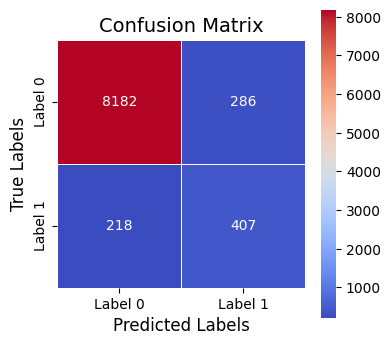

In [8]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_10, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_10)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

Epochenreduzierung

In [ ]:
samples, max_seq_len, vector_size = X_train_vectors.shape
num_classes = len(np.unique(y_train))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_11 = Sequential()

# LSTM-Schicht
model_11.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_11.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_11.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_11.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_11 = model_11.fit(
    X_train_vectors, np.array(y_train),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=5,
    batch_size=32,
    class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten

predictions_11 = model_11.predict(X_test_data_vectors)

threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_11= (predictions_11 > threshold).astype(int)



C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


KeyboardInterrupt: 

In [ ]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_11, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_11)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

Bidirektional

In [ ]:

# Modellinitialisierung
model_bidir = Sequential()

# Erste LSTM-Schicht mit Bidirectional für bessere Kontextverarbeitung
model_bidir.add(Bidirectional(LSTM(units=128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2)))

# Zweite LSTM-Schicht für tiefere Merkmalsextraktion
model_bidir.add(Bidirectional(LSTM(units=64, return_sequences=False, dropout=0.3, recurrent_dropout=0.2)))

# Dense-Schicht für die Ausgabe mit Sigmoid für binäre Klassifikation
model_bidir.add(Dense(units=1, activation='sigmoid'))

# Modell kompilieren mit verbessertem Optimierer und zusätzlichen Metriken
model_bidir.compile(optimizer=Adam(learning_rate=0.0005), 
                   loss='binary_crossentropy', 
                   metrics=['accuracy', Recall()])

# Early Stopping Callback zur Vermeidung von Overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Modelltraining mit optimierten Parametern
history_bidir= model_bidir.fit(
    X_train_vectors, y_train,
    validation_data=(X_test_data_vectors, y_test_data),
    epochs=20,  # Erhöhte Epochenzahl mit EarlyStopping
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Vorhersagen auf Testdaten
predictions_bidir = model_bidir.predict(X_test_data_vectors)
predicted_classes_bidir = (predictions_bidir > 0.35).astype(int)


Epoch 1/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 64s 90ms/step - accuracy: 0.9281 - loss: 0.2199 - recall_14: 0.1439 - val_accuracy: 0.9459 - val_loss: 0.1585 - val_recall_14: 0.3126
Epoch 2/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.9493 - loss: 0.1441 - recall_14: 0.3997 - val_accuracy: 0.9497 - val_loss: 0.1435 - val_recall_14: 0.3580
Epoch 3/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 60s 95ms/step - accuracy: 0.9537 - loss: 0.1295 - recall_14: 0.4949 - val_accuracy: 0.9525 - val_loss: 0.1427 - val_recall_14: 0.4050
Epoch 4/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.9565 - loss: 0.1219 - recall_14: 0.4742 - val_accuracy: 0.9531 - val_loss: 0.1331 - val_recall_14: 0.5059
Epoch 5/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.9611 - loss: 0.1142 - recall_14: 0.5358 - val_accuracy: 0.9545 - val_loss: 0.1382 - val_recall_14: 0.4319
Epoch 6/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.9627 - loss: 0.1049 - recall_14: 0.5925 - val_accuracy: 0.9555

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98      8239
     Class 1       0.71      0.51      0.59       595

    accuracy                           0.95      8834
   macro avg       0.84      0.75      0.78      8834
weighted avg       0.95      0.95      0.95      8834

[[8119  120]
 [ 294  301]]


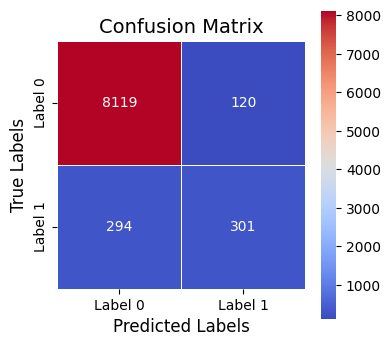

In [ ]:
# Klassifikationsbericht erstellen (als Dictionary)
report = classification_report(y_test_data, predicted_classes_bidir, output_dict=True)

# Metriken NUR für Klasse 2 extrahieren
precision_class_2 = report["1"]["precision"]
recall_class_2 = report["1"]["recall"]
f1_class_2 = report["1"]["f1-score"]

# Gesamtgenauigkeit berechnen
accuracy = accuracy_score(y_test_data, predicted_classes_bidir)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test_data, predicted_classes_bidir)

# Ergebnisse ausgeben (nur für Klasse 2)
print(f" F1-Score (Klasse 2): {f1_class_2:.4f}")
print(f" Recall (Klasse 2): {recall_class_2:.4f}")
print(f" Precision (Klasse 2): {precision_class_2:.4f}")
print(f" Accuracy (gesamt): {accuracy:.4f}")
print(f" MCC: {mcc:.4f}")

# Confusion Matrix berechnen
cm = confusion_matrix(y_test_data, predicted_classes_bidir)
print("Confusion Matrix:\n", cm)

# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

Bidirektional

In [ ]:
# Modellinitialisierung
model_bidir_2 = Sequential()

# Bidirektionale LSTM-Schicht
model_bidir_2.add(Bidirectional(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False)))

# Optional: Dropout zur Vermeidung von Overfitting
model_bidir_2.add(Dropout(0.3))

# Dense-Schicht für die Ausgabe
model_bidir_2.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_bidir_2.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3}

history_bidir_2 = model_bidir_2.fit(
    X_train_vectors, np.array(y_train)
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=20,
    batch_size=32,
    class_weight=class_weight,
    verbose=2
)

# Vorhersagen auf Testdaten
predictions_bidir_2 = model_bidir_2.predict(X_test_data_vectors)
threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_bidir_2 = (predictions_bidir_2 > threshold).astype(int)


C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
634/634 - 34s - 54ms/step - accuracy: 0.9272 - loss: 0.3389 - recall_1: 0.4996 - val_accuracy: 0.9397 - val_loss: 0.1638 - val_recall_1: 0.5600
Epoch 2/20
634/634 - 30s - 47ms/step - accuracy: 0.9422 - loss: 0.2708 - recall_1: 0.6296 - val_accuracy: 0.9393 - val_loss: 0.1725 - val_recall_1: 0.6688
Epoch 3/20
634/634 - 31s - 49ms/step - accuracy: 0.9491 - loss: 0.2307 - recall_1: 0.6990 - val_accuracy: 0.8863 - val_loss: 0.2900 - val_recall_1: 0.8176
Epoch 4/20
634/634 - 32s - 50ms/step - accuracy: 0.9548 - loss: 0.1986 - recall_1: 0.7476 - val_accuracy: 0.9480 - val_loss: 0.1489 - val_recall_1: 0.6320
Epoch 5/20
634/634 - 32s - 50ms/step - accuracy: 0.9658 - loss: 0.1587 - recall_1: 0.8073 - val_accuracy: 0.9532 - val_loss: 0.1354 - val_recall_1: 0.5680
Epoch 6/20
634/634 - 34s - 53ms/step - accuracy: 0.9739 - loss: 0.1221 - recall_1: 0.8559 - val_accuracy: 0.9459 - val_loss: 0.1617 - val_recall_1: 0.6272
Epoch 7/20
634/634 - 36s - 57ms/step - accuracy: 0.9800 - loss: 0.0877

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.98      0.98      8468
     Class 1       0.73      0.59      0.65       625

    accuracy                           0.96      9093
   macro avg       0.85      0.79      0.82      9093
weighted avg       0.95      0.96      0.95      9093

[[8333  135]
 [ 255  370]]


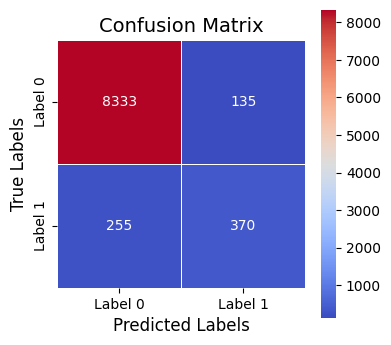

In [ ]:
# Klassifikationsbericht erstellen (als Dictionary)
report = classification_report(y_test_data, predicted_classes_bidir_2, output_dict=True)

# Metriken NUR für Klasse 2 extrahieren
precision_class_2 = report["1"]["precision"]
recall_class_2 = report["1"]["recall"]
f1_class_2 = report["1"]["f1-score"]

# Gesamtgenauigkeit berechnen
accuracy = accuracy_score(y_test_data, predicted_classes_bidir_2)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test_data, predicted_classes_bidir_2)

# Ergebnisse ausgeben (nur für Klasse 2)
print(f" F1-Score (Klasse 2): {f1_class_2:.4f}")
print(f" Recall (Klasse 2): {recall_class_2:.4f}")
print(f" Precision (Klasse 2): {precision_class_2:.4f}")
print(f" Accuracy (gesamt): {accuracy:.4f}")
print(f" MCC: {mcc:.4f}")

# Confusion Matrix berechnen
cm = confusion_matrix(y_test_data, predicted_classes_bidir_2)
print("Confusion Matrix:\n", cm)

# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()